In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


# Load and Visualize All Datasets

### FBI Hate Crime

In [9]:
crime_df = pd.read_csv("hate_crime.csv")
crime_df.head()

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,864279,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,2,Arson;Burglary/Breaking & Entering,NaN,Church/Synagogue/Temple/Mosque,Anti-Other Christian,Religious Organization,M,S
1,893434,2020,AK0010200,Fairbanks,NaN,City,AK,Alaska,Pacific,West,...,White,Not Hispanic or Latino,1,Aggravated Assault,1.0,Government/Public Building,Anti-Transgender,Individual,S,S
2,1052479,2020,AK0010300,Juneau,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,Anti-American Indian or Alaska Native,Individual,S,S
3,1054279,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,1,Sexual Assault With An Object,1.0,Park/Playground,Anti-Female,Individual,S,S
4,1054280,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,American Indian or Alaska Native,Not Hispanic or Latino,1,Aggravated Assault,1.0,Hotel/Motel/Etc.,Anti-Black or African American,Individual,S,S


In [11]:
crime_df['incident_date'] = pd.to_datetime(crime_df['incident_date'])

In [13]:
# Columns to keep: data_year, incident_date, offense_name, bias_desc
col_keep = ['data_year', 'incident_date', 'offense_name', 'bias_desc']
filtered_crime_df = crime_df[col_keep]
filtered_crime_df

,data_year,incident_date,offense_name,bias_desc
0,2020,2020-01-24,Arson;Burglary/Breaking & Entering,Anti-Other Christian
1,2020,2020-01-03,Aggravated Assault,Anti-Transgender
2,2020,2020-05-04,Aggravated Assault,Anti-American Indian or Alaska Native
3,2020,2020-06-01,Sexual Assault With An Object,Anti-Female
4,2020,2020-06-21,Aggravated Assault,Anti-Black or African American
...,...,...,...,...
20833,2021,2021-01-12,Intimidation,Anti-American Indian or Alaska Native
20834,2021,2021-01-04,Aggravated Assault,Anti-Female
20835,2021,2021-10-06,Aggravated Assault,Anti-Mental Disability
20836,2021,2021-05-20,All Other Larceny,"Anti-Lesbian, Gay, Bisexual, or Transgender (M..."


Note: The Hate Crime Statistics Data Collection compiles data about both single-bias and
multiple-bias hate crimes. A single-bias incident is defined as an incident in which one
or more offense types are motivated by the same bias. Beginning in 2013, law
enforcement agencies could report up to five bias motivations per offense type.
Therefore, the definition of a multiple-bias incident has been revised to “an incident in
which one or more offense types are motivated by two or more biases.”

- Anti-Asian
- Anti-Asian;Anti-Black or African American
- Anti-Asian;Anti-Other Race/Ethnicity/Ancestry
- Anti-Arab;Anti-Asian
- Anti-Asian;Anti-White
- Anti-Asian;Anti-Black or African American;Anti-Gay (Male)
- Anti-Asian;Anti-Hindu
- Anti-Asian;Anti-Black or African American;Anti-Islamic (Muslim)
- Anti-Asian;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)
- Anti-Asian;Anti-Black or African American;Anti-Multiple Races, Group
- Anti-Asian;Anti-Black or African American;Anti-Gay (Male);Anti-Multiple Races, Group
- Anti-Asian;Anti-Female
- Anti-Asian;Anti-Black or African American;Anti-Female;Anti-Jewish;Anti-Multiple Races, Group
- Anti-Asian;Anti-Jewish
- Anti-Asian;Anti-Black or African American;Anti-Jewish
- Anti-Asian;Anti-Multiple Races, Group
- Anti-Asian;Anti-Gay (Male)
- Anti-Asian;Anti-Black or African American;Anti-Hispanic or Latino
- Anti-Asian;Anti-Black or African American;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)
- Anti-American Indian or Alaska Native;Anti-Asian;Anti-Black or African American;Anti-Islamic (Muslim);Anti-White
- Anti-Asian;Anti-Female;Anti-Multiple Races, Group
- Anti-American Indian or Alaska Native;Anti-Asian
- Anti-Asian;Anti-Transgender
- Anti-Asian;Anti-Black or African American;Anti-Female;Anti-Multiple Races, Group
- Anti-Asian;Anti-Black or African American;Anti-Female;Anti-Hispanic or Latino
- Anti-Arab;Anti-Asian;Anti-Black or African American



In [15]:
# Filter those anti-asian incidents
asian_crime_df = filtered_crime_df[filtered_crime_df['bias_desc'].str.contains("Anti-Asian", case=True)]
asian_crime_df

,data_year,incident_date,offense_name,bias_desc
50,2020,2020-04-05,Destruction/Damage/Vandalism of Property,Anti-Asian
96,2020,2020-04-08,Aggravated Assault,Anti-Asian
180,2020,2020-03-19,Intimidation,Anti-Asian
211,2020,2020-12-01,Intimidation,Anti-Asian
340,2020,2020-09-08,Intimidation,Anti-Asian
...,...,...,...,...
20713,2021,2021-10-27,Simple Assault,Anti-Arab;Anti-Asian;Anti-Black or African Ame...
20738,2021,2021-11-05,Destruction/Damage/Vandalism of Property,Anti-Asian
20754,2021,2021-10-16,Destruction/Damage/Vandalism of Property,Anti-Asian
20801,2021,2021-10-06,Intimidation,Anti-Asian


In [18]:
crime_2020 = filtered_crime_df[filtered_crime_df['data_year']==2020]
crime_2021 = filtered_crime_df[filtered_crime_df['data_year']==2021]

asian_crime_2020 = asian_crime_df[asian_crime_df['data_year']==2020]
asian_crime_2021 = asian_crime_df[asian_crime_df['data_year']==2021]

In [19]:
# Ratio of anti-asian incidents
asian_ratio_2020 = len(asian_crime_2020) / len(crime_2020)
asian_ratio_2021 = len(asian_crime_2021) / len(crime_2021)
print('Number of Anti-Asian Hate Crimes: ', len(asian_crime_2020),len(asian_crime_2021))
print('Number of all hate crimes: ', len(crime_2020), len(crime_2021))
print('Ratio of Anti-Asian hate crimes: ', asian_ratio_2020, asian_ratio_2021)

Number of Anti-Asian Hate Crimes:  357 778
Number of all hate crimes:  9949 10889
Ratio of Anti-Asian hate crimes:  0.035883003316916275 0.07144825052805584


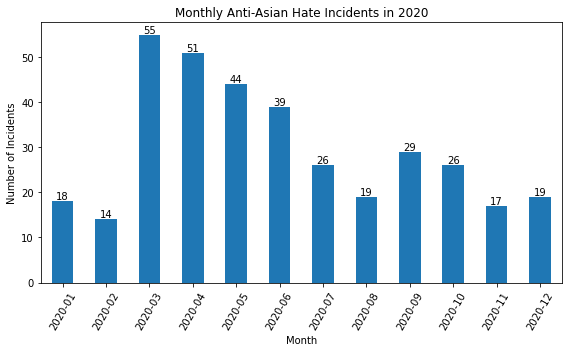

In [52]:
asian_monthly_counts = asian_crime_2020.groupby(asian_crime_2020['incident_date'].dt.to_period('M')).size()

asian_monthly_counts.plot(kind='bar', figsize=(8, 5))

plt.title('Monthly Anti-Asian Hate Incidents in 2020')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability

for index, value in enumerate(asian_monthly_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

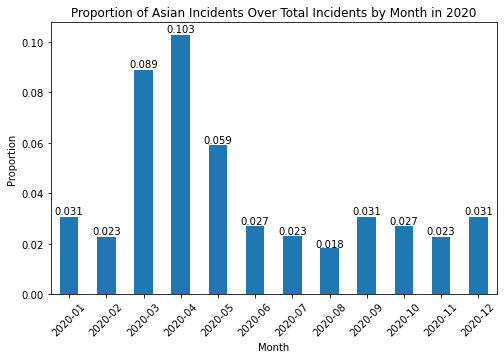

In [53]:
df_2020_monthly = crime_2020.groupby(crime_2020['incident_date'].dt.to_period('M')).size()
monthly_proportions = asian_monthly_counts / df_2020_monthly

monthly_proportions.plot(kind='bar', figsize=(8, 5))
plt.title('Proportion of Asian Incidents Over Total Incidents by Month in 2020')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

for index, value in enumerate(monthly_proportions):
    plt.text(index, round(value, 3), str(round(value, 3)), ha='center', va='bottom')

plt.show()

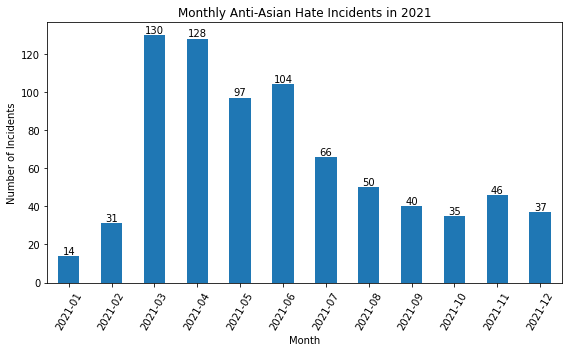

In [23]:
asian_monthly_counts = asian_crime_2021.groupby(asian_crime_2021['incident_date'].dt.to_period('M')).size()

asian_monthly_counts.plot(kind='bar', figsize=(8, 5))

plt.title('Monthly Anti-Asian Hate Incidents in 2021')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability

for index, value in enumerate(asian_monthly_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

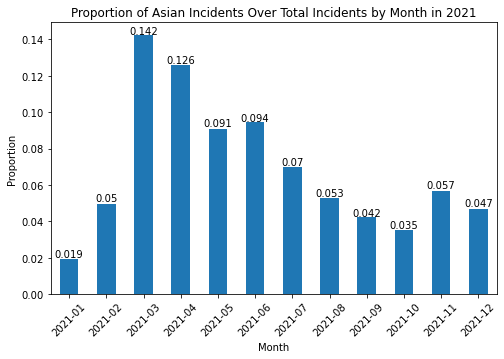

In [24]:
df_2021_monthly = crime_2021.groupby(crime_2021['incident_date'].dt.to_period('M')).size()
monthly_proportions = asian_monthly_counts / df_2021_monthly

monthly_proportions.plot(kind='bar', figsize=(8, 5))
plt.title('Proportion of Asian Incidents Over Total Incidents by Month in 2021')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

for index, value in enumerate(monthly_proportions):
    plt.text(index, round(value, 3), str(round(value, 3)), ha='center', va='bottom')

plt.show()

FBI Hate Crime EDA:
- 2020: Peak in March and April, two tails are insignificant in comparison
- 2021: Peak in March and April, the peak effect spillover to later month decreasingly with another increase in November

In [182]:
monthly_fbi = asian_crime_df.groupby(asian_crime_df['incident_date'].dt.to_period('M')).size()

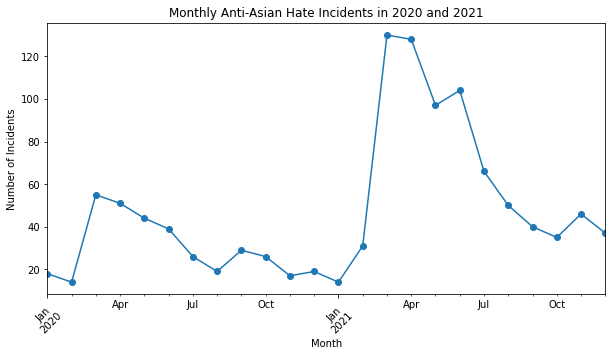

In [184]:
monthly_fbi.plot(kind='line', figsize=(10, 5), marker='o')

plt.title('Monthly Anti-Asian Hate Incidents in 2020 and 2021')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

plt.show()

### Google Search Trend

In [83]:
google_df = pd.read_csv("/Users/itsyuzhou/Winter2024/MA_thesis/GoogleTrends.csv")
google_df

,Week,Chink + Chinaman + Chinkland + Gook: (United States),Chinese virus + China virus + Wuhan virus + Kung flu: (United States)
0,2020-01-05,1,1
1,2020-01-12,1,2
2,2020-01-19,1,89
3,2020-01-26,1,100
4,2020-02-02,1,40
...,...,...,...
99,2021-11-28,1,1
100,2021-12-05,1,1
101,2021-12-12,1,1
102,2021-12-19,1,1


In [26]:
google_df['Week'] = pd.to_datetime(google_df['Week'])
google_df['Chinese virus + China virus + Wuhan virus + Kung flu: (United States)'] = google_df['Chinese virus + China virus + Wuhan virus + Kung flu: (United States)'].replace('<1', '0.5').astype(float)
google_df['Chink + Chinaman + Chinkland + Gook: (United States)'] = google_df['Chink + Chinaman + Chinkland + Gook: (United States)'].replace('<1', '0.5').astype(float)

google_df.dtypes

Week                                                                     datetime64[ns]
Chink + Chinaman + Chinkland + Gook: (United States)                            float64
Chinese virus + China virus + Wuhan virus + Kung flu: (United States)           float64
dtype: object

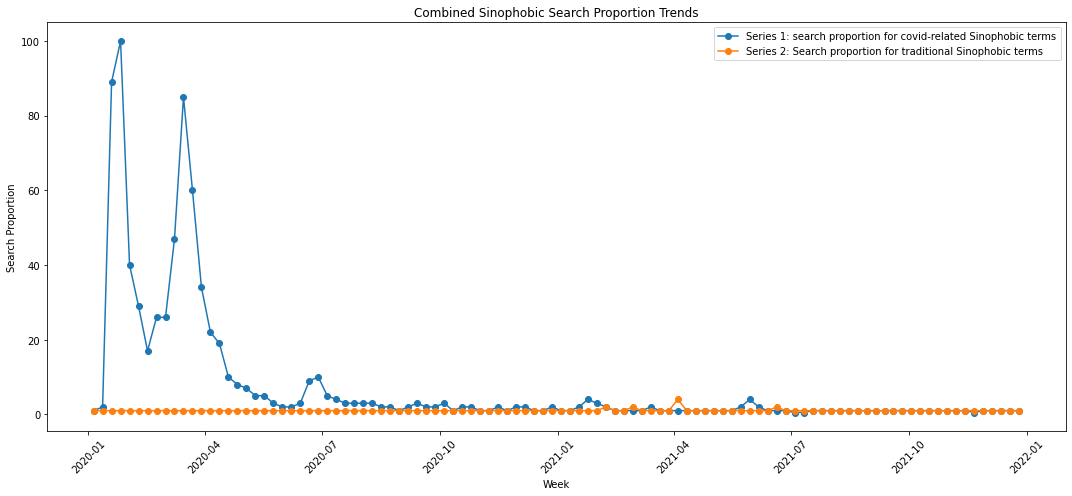

In [29]:
plt.figure(figsize=(15, 7))

plt.plot(
    google_df['Week'].values, 
    google_df['Chinese virus + China virus + Wuhan virus + Kung flu: (United States)'].values, 
    marker='o', linestyle='-', 
    label='Series 1: search proportion for covid-related Sinophobic terms'
)

plt.plot(
    google_df['Week'].values, 
    google_df['Chink + Chinaman + Chinkland + Gook: (United States)'].values, 
    marker='o', linestyle='-', 
    label='Series 2: Search proportion for traditional Sinophobic terms'
)

plt.title('Combined Sinophobic Search Proportion Trends')
plt.xlabel('Week')
plt.ylabel('Search Proportion')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Google Search Trend EDA:
- Covid-related Sinophobic searches peak in 2020/2 and 2020/3, with another noticeable increase in 2020/6 and 2020/7
- Traditional Sinophobic searches peak in 2021/2, 2021/3, 2021/4 (most significant), and 2021/7

#### Combined 2020 and 2021 dataset

In [173]:
google_df = pd.read_csv("/Users/itsyuzhou/Winter2024/MA_thesis/google_trends.csv")
google_df

,Week,Chink + Chinaman + Chinkland + Gook + Chinese virus + China virus + Wuhan virus + Kung flu: (United States)
0,2019-12-29,1
1,2020-01-05,2
2,2020-01-12,4
3,2020-01-19,99
4,2020-01-26,100
...,...,...
100,2021-11-28,2
101,2021-12-05,2
102,2021-12-12,2
103,2021-12-19,2


In [174]:
google_df['Week'] = pd.to_datetime(google_df['Week'])

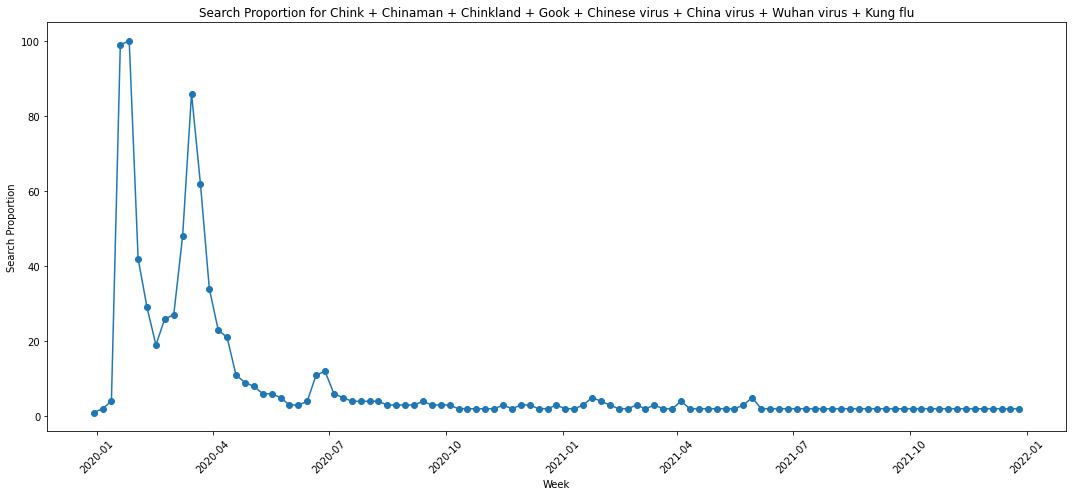

In [145]:
plt.figure(figsize=(15, 7))
plt.plot(
    google_df['Week'].values, 
    google_df['Chink + Chinaman + Chinkland + Gook + Chinese virus + China virus + Wuhan virus + Kung flu: (United States)'].values, 
    marker='o', linestyle='-'
)

plt.title('Search Proportion for Chink + Chinaman + Chinkland + Gook + Chinese virus + China virus + Wuhan virus + Kung flu')
plt.xlabel('Week')
plt.ylabel('Search Proportion')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [33]:
comment_df = pd.read_csv("/Users/itsyuzhou/Winter2024/Content-Analysis-Homework/final_project/china_sentiment.csv", lineterminator='\n')
comment_df.head()

,Comment PublishedAt,Comment,Video PublishedAt,Video Title,tokenized_text,normalized_tokens,Hate Speech Score
0,2023-03-16,Hey! First comment of 2023! Is it anniversary ...,2020-03-09,Tucker: We must remain calm but not complacent...,"['Hey', 'First', 'comment', 'of', '2023', 'Is'...","['hey', 'comment', 'anniversary', 'day', 'chin...",0.685360
1,2021-03-26,Lora of good warnings here... that unfortunate...,2020-03-09,Tucker: We must remain calm but not complacent...,"['Lora', 'of', 'good', 'warnings', 'here', 'th...","['lora', 'good', 'warnings', 'unfortunately', ...",0.320128
2,2020-06-22,The Chinese Coronavirus.,2020-03-09,Tucker: We must remain calm but not complacent...,"['The', 'Chinese', 'Coronavirus']","['chinese', 'coronavirus']",0.000340
3,2020-06-09,I bet his favorite food is Chinese food. Gtfoh,2020-03-09,Tucker: We must remain calm but not complacent...,"['I', 'bet', 'his', 'favorite', 'food', 'is', ...","['bet', 'favorite', 'food', 'chinese', 'food',...",0.999489
4,2020-05-19,Did he just said that China is the most racist...,2020-03-09,Tucker: We must remain calm but not complacent...,"['Did', 'he', 'just', 'said', 'that', 'China',...","['said', 'china', 'racist', 'country', 'world']",0.000678


In [146]:
comment_df = pd.read_csv("/Users/itsyuzhou/Winter2024/MA_thesis/sinophobia_llm.csv", lineterminator='\n')

# Convert to Monthly Time Series

### YouTube Comment

In [168]:
comment_df['Video PublishedAt'] = pd.to_datetime(comment_df['Video PublishedAt'])
monthly_hate_amount = comment_df.groupby(comment_df['Video PublishedAt'].dt.to_period('M'))['Hate Speech'].sum()
monthly_hate_amount

Video PublishedAt
2020-01      76
2020-02      97
2020-03     809
2020-04      10
2020-05     137
2020-06      58
2020-07      40
2020-08       4
2020-09    2696
2020-10     132
2020-11      75
2020-12      46
2021-01      11
2021-02       5
2021-03       9
2021-04      14
2021-05      65
2021-06      68
2021-07      36
2021-08     144
2021-09      83
2021-10      22
2021-11      74
2021-12      63
Freq: M, Name: Hate Speech, dtype: int64

In [169]:
monthly_hate_intensity = comment_df.groupby(comment_df['Video PublishedAt'].dt.to_period('M'))['Hate Speech Score'].mean()
monthly_hate_intensity

Video PublishedAt
2020-01    0.441886
2020-02    0.443404
2020-03    0.386435
2020-04    0.322001
2020-05    0.383086
2020-06    0.475127
2020-07    0.372409
2020-08    0.365997
2020-09    0.417827
2020-10    0.290872
2020-11    0.367612
2020-12    0.327474
2021-01    0.298273
2021-02    0.224269
2021-03    0.278728
2021-04    0.345521
2021-05    0.357973
2021-06    0.344697
2021-07    0.271475
2021-08    0.353240
2021-09    0.343279
2021-10    0.392170
2021-11    0.410242
2021-12    0.405912
Freq: M, Name: Hate Speech Score, dtype: float64

### Google Searches

In [178]:
google_df.set_index('Week', inplace=True)

monthly_google = google_df['Chink + Chinaman + Chinkland + Gook + Chinese virus + China virus + Wuhan virus + Kung flu: (United States)'].resample('M').mean()

/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_21535/3616319333.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_google = google_df['Chink + Chinaman + Chinkland + Gook + Chinese virus + China virus + Wuhan virus + Kung flu: (United States)'].resample('M').mean()


In [181]:
monthly_google = monthly_google.iloc[1:]
monthly_google

Week
2020-01-31    51.25
2020-02-29    29.00
2020-03-31    51.40
2020-04-30    16.00
2020-05-31     5.60
2020-06-30     7.50
2020-07-31     4.75
2020-08-31     3.40
2020-09-30     3.25
2020-10-31     2.25
2020-11-30     2.40
2020-12-31     2.50
2021-01-31     3.20
2021-02-28     2.50
2021-03-31     2.25
2021-04-30     2.50
2021-05-31     2.80
2021-06-30     2.00
2021-07-31     2.00
2021-08-31     2.00
2021-09-30     2.00
2021-10-31     2.00
2021-11-30     2.00
2021-12-31     2.00
Freq: ME, Name: Chink + Chinaman + Chinkland + Gook + Chinese virus + China virus + Wuhan virus + Kung flu: (United States), dtype: float64

In [195]:
monthly_google.index = monthly_google.index.to_period('M')
monthly_google

Week
2020-01    51.25
2020-02    29.00
2020-03    51.40
2020-04    16.00
2020-05     5.60
2020-06     7.50
2020-07     4.75
2020-08     3.40
2020-09     3.25
2020-10     2.25
2020-11     2.40
2020-12     2.50
2021-01     3.20
2021-02     2.50
2021-03     2.25
2021-04     2.50
2021-05     2.80
2021-06     2.00
2021-07     2.00
2021-08     2.00
2021-09     2.00
2021-10     2.00
2021-11     2.00
2021-12     2.00
Freq: M, Name: Chink + Chinaman + Chinkland + Gook + Chinese virus + China virus + Wuhan virus + Kung flu: (United States), dtype: float64

### FBI Hate Crimes

In [187]:
monthly_fbi

incident_date
2020-01     18
2020-02     14
2020-03     55
2020-04     51
2020-05     44
2020-06     39
2020-07     26
2020-08     19
2020-09     29
2020-10     26
2020-11     17
2020-12     19
2021-01     14
2021-02     31
2021-03    130
2021-04    128
2021-05     97
2021-06    104
2021-07     66
2021-08     50
2021-09     40
2021-10     35
2021-11     46
2021-12     37
Freq: M, dtype: int64

### NCVS Hate Crimes

In [192]:
# NCVS data is in R, recreate the data in data frame
ncvs = {
    "Date": ["2020-09-01", "2020-11-01", "2020-12-01", "2021-03-01", "2021-04-01", 
             "2021-05-01", "2021-06-01", "2021-07-01", "2021-11-01"],
    "Value": [3, 2, 2, 1, 1, 1, 4, 2, 1]
}

ncvs_df = pd.DataFrame(ncvs)

ncvs_df['Date'] = pd.to_datetime(ncvs_df['Date'])
ncvs_df

,Date,Value
0,2020-09-01,3
1,2020-11-01,2
2,2020-12-01,2
3,2021-03-01,1
4,2021-04-01,1
5,2021-05-01,1
6,2021-06-01,4
7,2021-07-01,2
8,2021-11-01,1


In [193]:
monthly_ncvs = ncvs_df.set_index('Date')['Value']
monthly_ncvs

Date
2020-09-01    3
2020-11-01    2
2020-12-01    2
2021-03-01    1
2021-04-01    1
2021-05-01    1
2021-06-01    4
2021-07-01    2
2021-11-01    1
Name: Value, dtype: int64

# Correlation Alaysis

In [196]:
comment_google_fbi = pd.concat([monthly_hate_amount, monthly_hate_intensity, monthly_google, monthly_fbi], axis=1)

In [199]:
comment_google_fbi = comment_google_fbi.rename(columns={
    'Hate Speech': 'Hate Amount',
    'Hate Speech Score': 'Hate Intensity',
    'Chink + Chinaman + Chinkland + Gook + Chinese virus + China virus + Wuhan virus + Kung flu: (United States)': 'Sinophobic Google Search', 
    0: 'FBI Hate Crimes'})

In [201]:
pearsoncorr = comment_google_fbi.corr(method='pearson')
pearsoncorr.round(3)

,Hate Amount,Hate Intensity,Sinophobic Google Search,FBI Hate Crimes
Hate Amount,1.000,0.254,0.105,-0.112
Hate Intensity,0.254,1.000,0.394,-0.267
Sinophobic Google Search,0.105,0.394,1.000,-0.182
FBI Hate Crimes,-0.112,-0.267,-0.182,1.000


In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
comment_google_fbi_standardized = pd.DataFrame(scaler.fit_transform(comment_google_fbi), columns=comment_google_fbi.columns, index=comment_google_fbi.index)

# Regression Analysis

## 1. OLS (Ordinary Least Squares)

In [66]:
import statsmodels.api as sm

### 1.1 Hate Intensity and Amount

In [219]:
y = comment_google_fbi_standardized['Hate Amount']
x = comment_google_fbi_standardized['Hate Intensity']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Hate Amount   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.519
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.231
Time:                        09:40:45   Log-Likelihood:                -33.254
No. Observations:                  24   AIC:                             70.51
Df Residuals:                      22   BIC:                             72.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.776e-17      0.206   1.35e

In [220]:
x = comment_google_fbi_standardized['Hate Amount']
y = comment_google_fbi_standardized['Hate Intensity']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Hate Intensity   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.519
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.231
Time:                        09:40:47   Log-Likelihood:                -33.254
No. Observations:                  24   AIC:                             70.51
Df Residuals:                      22   BIC:                             72.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.153e-17      0.206   3.95e-16      

- hate amount = 0.2541 * hate intensity + 2.776e-17
- hate intensity = 0.2541 * hate amount + 8.153e-17

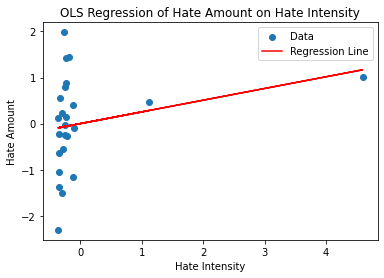

In [223]:
x_values = x.values
y_values = y.values

plt.scatter(x_values[:, 1], y_values, label='Data')
plt.plot(x_values[:, 1], model.predict(), color='red', label='Regression Line')
plt.xlabel('Hate Intensity')
plt.ylabel('Hate Amount')
plt.title('OLS Regression of Hate Amount on Hate Intensity')
plt.legend()
plt.show()

### 1.2 Google trends and hate amount

In [224]:
y = comment_google_fbi_standardized['Hate Amount']
x = comment_google_fbi_standardized['Sinophobic Google Search']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Hate Amount   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.2458
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.625
Time:                        09:42:33   Log-Likelihood:                -33.921
No. Observations:                  24   AIC:                             71.84
Df Residuals:                      22   BIC:                             74.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [208]:
x = comment_google_fbi_standardized['Hate Amount']
y = comment_google_fbi_standardized['Sinophobic Google Search']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Sinophobic Google Search   R-squared:                       0.011
Model:                                  OLS   Adj. R-squared:                 -0.034
Method:                       Least Squares   F-statistic:                    0.2458
Date:                      Mon, 25 Mar 2024   Prob (F-statistic):              0.625
Time:                              09:23:01   Log-Likelihood:                -33.921
No. Observations:                        24   AIC:                             71.84
Df Residuals:                            22   BIC:                             74.20
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

- hate amount = 0.1051 * Sinophobic Google search + 2.776e-17
- Sinophobic Google search = 0.1051 * hate amount - 9.714e-17

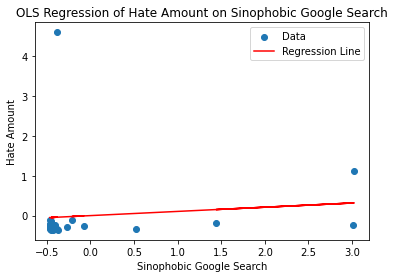

In [225]:
x_values = x.values
y_values = y.values

plt.scatter(x_values[:, 1], y_values, label='Data')
plt.plot(x_values[:, 1], model.predict(), color='red', label='Regression Line')
plt.xlabel('Sinophobic Google Search')
plt.ylabel('Hate Amount')
plt.title('OLS Regression of Hate Amount on Sinophobic Google Search')
plt.legend()
plt.show()

### 1.3 Google trends and hate intensity

In [226]:
y = comment_google_fbi_standardized['Hate Intensity']
x = comment_google_fbi_standardized['Sinophobic Google Search']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Hate Intensity   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     4.040
Date:                Mon, 25 Mar 2024   Prob (F-statistic):             0.0568
Time:                        09:43:39   Log-Likelihood:                -32.031
No. Observations:                  24   AIC:                             68.06
Df Residuals:                      22   BIC:                             70.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [210]:
x = comment_google_fbi_standardized['Hate Intensity']
y = comment_google_fbi_standardized['Sinophobic Google Search']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Sinophobic Google Search   R-squared:                       0.155
Model:                                  OLS   Adj. R-squared:                  0.117
Method:                       Least Squares   F-statistic:                     4.040
Date:                      Mon, 25 Mar 2024   Prob (F-statistic):             0.0568
Time:                              09:26:31   Log-Likelihood:                -32.031
No. Observations:                        24   AIC:                             68.06
Df Residuals:                            22   BIC:                             70.42
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

- hate intensity = 0.3939 * Sinophobic Google search + 8.153e-17
- Sinophobic Google search = 0.3939 * hate intensity - 9.714e-17

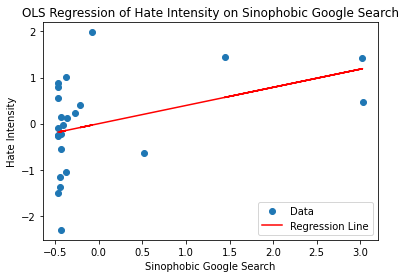

In [227]:
x_values = x.values
y_values = y.values

plt.scatter(x_values[:, 1], y_values, label='Data')
plt.plot(x_values[:, 1], model.predict(), color='red', label='Regression Line')
plt.xlabel('Sinophobic Google Search')
plt.ylabel('Hate Intensity')
plt.title('OLS Regression of Hate Intensity on Sinophobic Google Search')
plt.legend()
plt.show()

### 1.4 FBI Hate Crimes and Hate Amount

In [229]:
y = comment_google_fbi_standardized['Hate Amount']
x = comment_google_fbi_standardized['FBI Hate Crimes']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Hate Amount   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.2779
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.603
Time:                        09:44:57   Log-Likelihood:                -33.904
No. Observations:                  24   AIC:                             71.81
Df Residuals:                      22   BIC:                             74.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.776e-17      0.212   1.

In [213]:
x = comment_google_fbi_standardized['Hate Amount']
y = comment_google_fbi_standardized['FBI Hate Crimes']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        FBI Hate Crimes   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.2779
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.603
Time:                        09:30:40   Log-Likelihood:                -33.904
No. Observations:                  24   AIC:                             71.81
Df Residuals:                      22   BIC:                             74.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.11e-16      0.212   5.24e-16      

- hate amount = -0.1117 * FBI hate crimes + 2.776e-17
- FBI hate crimes = -0.1117 * hate amount + 1.11e-16

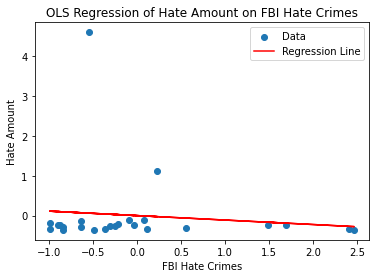

In [230]:
x_values = x.values
y_values = y.values

plt.scatter(x_values[:, 1], y_values, label='Data')
plt.plot(x_values[:, 1], model.predict(), color='red', label='Regression Line')
plt.xlabel('FBI Hate Crimes')
plt.ylabel('Hate Amount')
plt.title('OLS Regression of Hate Amount on FBI Hate Crimes')
plt.legend()
plt.show()

### 1.5 FBI Hate Crimes and Hate Intensity

In [231]:
y = comment_google_fbi_standardized['Hate Intensity']
x = comment_google_fbi_standardized['FBI Hate Crimes']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Hate Intensity   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.685
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.208
Time:                        09:45:12   Log-Likelihood:                -33.169
No. Observations:                  24   AIC:                             70.34
Df Residuals:                      22   BIC:                             72.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            8.153e-17      0.205   3.

In [215]:
x = comment_google_fbi_standardized['Hate Intensity']
y = comment_google_fbi_standardized['FBI Hate Crimes']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        FBI Hate Crimes   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.685
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.208
Time:                        09:32:36   Log-Likelihood:                -33.169
No. Observations:                  24   AIC:                             70.34
Df Residuals:                      22   BIC:                             72.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.11e-16      0.205    5.4e

- hate intensity = -0.2667 * FBI hate crimes + 8.153e-17
- FBI hate crimes = -0.2667 * hate intensity + 1.11e-16

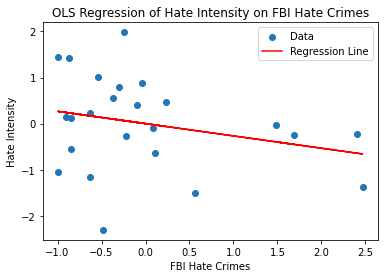

In [232]:
x_values = x.values
y_values = y.values

plt.scatter(x_values[:, 1], y_values, label='Data')
plt.plot(x_values[:, 1], model.predict(), color='red', label='Regression Line')
plt.xlabel('FBI Hate Crimes')
plt.ylabel('Hate Intensity')
plt.title('OLS Regression of Hate Intensity on FBI Hate Crimes')
plt.legend()
plt.show()

### 1.6 FBI Hate Crimes and Sinophobic Google Searches

In [233]:
y = comment_google_fbi_standardized['Sinophobic Google Search']
x = comment_google_fbi_standardized['FBI Hate Crimes']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Sinophobic Google Search   R-squared:                       0.033
Model:                                  OLS   Adj. R-squared:                 -0.011
Method:                       Least Squares   F-statistic:                    0.7503
Date:                      Mon, 25 Mar 2024   Prob (F-statistic):              0.396
Time:                              09:45:42   Log-Likelihood:                -33.652
No. Observations:                        24   AIC:                             71.30
Df Residuals:                            22   BIC:                             73.66
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [218]:
x = comment_google_fbi_standardized['Sinophobic Google Search']
y = comment_google_fbi_standardized['FBI Hate Crimes']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        FBI Hate Crimes   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.7503
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.396
Time:                        09:35:13   Log-Likelihood:                -33.652
No. Observations:                  24   AIC:                             71.30
Df Residuals:                      22   BIC:                             73.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- Sinophobic Google search = -0.1816 * FBI hate crimes - 9.714e-17
- FBI hate crimes = -0.1816 * Sinophobic Google search + 1.11e-16

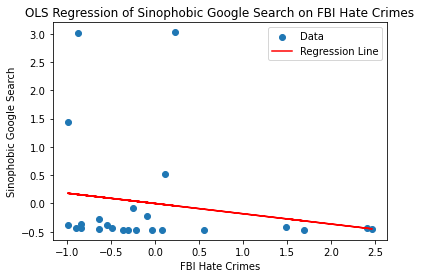

In [234]:
x_values = x.values
y_values = y.values

plt.scatter(x_values[:, 1], y_values, label='Data')
plt.plot(x_values[:, 1], model.predict(), color='red', label='Regression Line')
plt.xlabel('FBI Hate Crimes')
plt.ylabel('Sinophobic Google Search')
plt.title('OLS Regression of Sinophobic Google Search on FBI Hate Crimes')
plt.legend()
plt.show()

## 2. VAR (Vector Autoregression)

A VAR(p) model for a multivariate time series is a regression model for outcomes at a specified time t and time lagged predictors, with p indicating the lag (e.g., p = 1 refers to the observation previous to t; p = 2 refers to two observations prior to t, and so on ).
- Testing Stationarity
- Selecting Lag Length
- Building the VAR Model
- Testing for Residual Autocorrelation
- Assessing Stability of the VAR Model
- Evaluating Granger Causality

### 2.1 Test Stationarity - Augmented Dickey-Fuller Test

Stationarity is critical to development of a VAR model because in its absence, a model’s statistics such as means and correlations will not accurately describe the time series signal.

The augmented Dickey-Fuller test is used to test stationarity. The null hypothesis is that the time series is nonstationary and the alternative is that the series is stationary. Rejection of the null hypothesis indicates that the series does not need transformation to achieve stationarity and modeling can proceed to the lag length selection step.
- Null Hypothesis (HO): Series is non-stationary, or series has a unit root.
- Alternate Hypothesis(HA): Series is stationary, or series has no unit root.

Citation: https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/

In [103]:
from statsmodels.tsa.stattools import adfuller

In [104]:
def adf_test(timeseries):
    print ('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [236]:
comment_google_fbi_standardized

,Hate Amount,Hate Intensity,Sinophobic Google Search,FBI Hate Crimes
2020-01,-0.226219,1.414206,3.015082,-0.873908
2020-02,-0.187570,1.440158,1.441919,-0.993247
2020-03,1.122811,0.466240,3.025688,0.229976
2020-04,-0.347687,-0.635303,0.522767,0.110637
2020-05,-0.113953,0.408987,-0.212554,-0.098206
2020-06,-0.259346,1.982486,-0.078216,-0.247379
2020-07,-0.292474,0.226451,-0.272652,-0.635231
2020-08,-0.358729,0.116839,-0.368103,-0.844074
2020-09,4.595689,1.002906,-0.378708,-0.545727
2020-10,-0.123155,-1.167472,-0.449412,-0.635231


In [237]:
adf_test(comment_google_fbi_standardized['Hate Amount'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -4.878091
p-value                         0.000038
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [238]:
adf_test(comment_google_fbi_standardized['Hate Intensity'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -2.991123
p-value                         0.035732
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [235]:
adf_test(comment_google_fbi_standardized['Sinophobic Google Search'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -4.003023
p-value                         0.001395
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [239]:
adf_test(comment_google_fbi_standardized['FBI Hate Crimes'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -1.983590
p-value                         0.293814
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


Among YouTube comment hate amount, hate intensity, Sinophobic Google searches, and FBI anti-Asian hate crimes, only the last one is non-stationary, so need to difference hate crime time series.

### 2.2 Difference Non-Stationary

In [241]:
mean = monthly_fbi.mean()
std = monthly_fbi.std()

# Standardize the FBI hate crime series
monthly_fbi_standardized = (monthly_fbi - mean) / std
monthly_fbi_standardized

incident_date
2020-01   -0.855508
2020-02   -0.972334
2020-03    0.225134
2020-04    0.108308
2020-05   -0.096138
2020-06   -0.242171
2020-07   -0.621856
2020-08   -0.826302
2020-09   -0.534236
2020-10   -0.621856
2020-11   -0.884715
2020-12   -0.826302
2021-01   -0.972334
2021-02   -0.475823
2021-03    2.415624
2021-04    2.357211
2021-05    1.451809
2021-06    1.656254
2021-07    0.546406
2021-08    0.079101
2021-09   -0.212964
2021-10   -0.358997
2021-11   -0.037725
2021-12   -0.300584
Freq: M, dtype: float64

In [242]:
monthly_fbi_diff = monthly_fbi_standardized.diff().dropna()

In [243]:
adf_test(monthly_fbi_diff)

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -4.067213
p-value                         0.001097
#Lags Used                      0.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [246]:
comment_google_fbi_standardized['FBI Hate Crimes'] = monthly_fbi_diff.to_frame(name='FBI Hate Crimes')

In [252]:
comment_google_fbi_standardized['FBI Hate Crimes'] = comment_google_fbi_standardized['FBI Hate Crimes'].fillna(0)

In [253]:
adf_test(comment_google_fbi_standardized['FBI Hate Crimes'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -4.162875
p-value                         0.000761
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


### 2.3 Select Lag Length and Build the VAR model

In [254]:
from statsmodels.tsa.api import VAR

model = VAR(comment_google_fbi_standardized)
optimal_order = model.select_order()
print(optimal_order.selected_orders)

{'aic': 3, 'bic': 3, 'hqic': 3, 'fpe': 3}


In [255]:
optimal_order.summary()

,AIC,BIC,FPE,HQIC
0,-3.445,-3.246,0.03193,-3.401
1,-5.007,-4.012,0.006947,-4.791
2,-3.864,-2.074,0.02658,-3.476
3,-6.605*,-4.019*,0.003120*,-6.044*


In [257]:
# Lag length=3, fit the VAR model
model_fitted = model.fit(3)
resid = model_fitted.resid[optimal_order.aic:]

### 2.4 Granger Causality Test on VAR

In [258]:
from statsmodels.tsa.stattools import grangercausalitytests

In [263]:
# Hate Amount -> Hate Intensity

results = grangercausalitytests(resid[['Hate Amount', 'Hate Intensity']], maxlag=4, verbose=False)
p_values_tgo = []

for lag, test_results in results.items():
    print(f"Lag {lag}")
    print(f"\tF-Statistic: {test_results[0]['params_ftest'][0]:.4f}, p-value: {test_results[0]['params_ftest'][1]:.4f}")
    p_values_tgo.append([lag, test_results[0]['params_ftest'][1]])

Lag 1
	F-Statistic: 1.1153, p-value: 0.3088
Lag 2
	F-Statistic: 0.5153, p-value: 0.6111
Lag 3
	F-Statistic: 1.4064, p-value: 0.3102
Lag 4
	F-Statistic: 2.3991, p-value: 0.1816


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [264]:
# Hate Intensity -> Hate Amount

results = grangercausalitytests(resid[['Hate Intensity', 'Hate Amount']], maxlag=4, verbose=False)
p_values_tgo = []

for lag, test_results in results.items():
    print(f"Lag {lag}")
    print(f"\tF-Statistic: {test_results[0]['params_ftest'][0]:.4f}, p-value: {test_results[0]['params_ftest'][1]:.4f}")
    p_values_tgo.append([lag, test_results[0]['params_ftest'][1]])

print('Hate Amount --> Hate Intensity: ',p_values_tgo)

Lag 1
	F-Statistic: 2.0988, p-value: 0.1694
Lag 2
	F-Statistic: 2.3800, p-value: 0.1384
Lag 3
	F-Statistic: 0.9401, p-value: 0.4653
Lag 4
	F-Statistic: 1.0249, p-value: 0.4759
Hate Amount --> Hate Intensity:  [[1, 0.16944250825928656], [2, 0.13838462718026437], [3, 0.4653138680082187], [4, 0.47588599576584956]]


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [267]:
# Hate Amount -> Google Searches

results = grangercausalitytests(resid[['Hate Amount', 'Sinophobic Google Search']], maxlag=4, verbose=False)
p_values_tgo = []

for lag, test_results in results.items():
    print(f"Lag {lag}")
    print(f"\tF-Statistic: {test_results[0]['params_ftest'][0]:.4f}, p-value: {test_results[0]['params_ftest'][1]:.4f}")
    p_values_tgo.append([lag, test_results[0]['params_ftest'][1]])

Lag 1
	F-Statistic: 0.4906, p-value: 0.4951
Lag 2
	F-Statistic: 0.3306, p-value: 0.7254
Lag 3
	F-Statistic: 0.0809, p-value: 0.9685
Lag 4
	F-Statistic: 0.0741, p-value: 0.9871


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [268]:
# Google Searches -> Hate Amount

results = grangercausalitytests(resid[['Sinophobic Google Search', 'Hate Amount']], maxlag=4, verbose=False)
p_values_tgo = []

for lag, test_results in results.items():
    print(f"Lag {lag}")
    print(f"\tF-Statistic: {test_results[0]['params_ftest'][0]:.4f}, p-value: {test_results[0]['params_ftest'][1]:.4f}")
    p_values_tgo.append([lag, test_results[0]['params_ftest'][1]])

Lag 1
	F-Statistic: 0.0338, p-value: 0.8568
Lag 2
	F-Statistic: 0.3616, p-value: 0.7045
Lag 3
	F-Statistic: 0.1265, p-value: 0.9417
Lag 4
	F-Statistic: 3.5823, p-value: 0.0971


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [265]:
# Hate Intensity -> Google Searches

results = grangercausalitytests(resid[['Hate Intensity', 'Sinophobic Google Search']], maxlag=4, verbose=False)
p_values_tgo = []

for lag, test_results in results.items():
    print(f"Lag {lag}")
    print(f"\tF-Statistic: {test_results[0]['params_ftest'][0]:.4f}, p-value: {test_results[0]['params_ftest'][1]:.4f}")
    p_values_tgo.append([lag, test_results[0]['params_ftest'][1]])

Lag 1
	F-Statistic: 2.8422, p-value: 0.1140
Lag 2
	F-Statistic: 1.4051, p-value: 0.2861
Lag 3
	F-Statistic: 1.2838, p-value: 0.3442
Lag 4
	F-Statistic: 2.1731, p-value: 0.2085


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [266]:
# Google Searches -> Hate Intensity

results = grangercausalitytests(resid[['Sinophobic Google Search', 'Hate Intensity']], maxlag=4, verbose=False)
p_values_tgo = []

for lag, test_results in results.items():
    print(f"Lag {lag}")
    print(f"\tF-Statistic: {test_results[0]['params_ftest'][0]:.4f}, p-value: {test_results[0]['params_ftest'][1]:.4f}")
    p_values_tgo.append([lag, test_results[0]['params_ftest'][1]])

Lag 1
	F-Statistic: 0.0001, p-value: 0.9941
Lag 2
	F-Statistic: 1.0906, p-value: 0.3697
Lag 3
	F-Statistic: 0.5971, p-value: 0.6345
Lag 4
	F-Statistic: 0.8953, p-value: 0.5295


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [269]:
# Hate Amount -> FBI Hate Crimes

results = grangercausalitytests(resid[['Hate Amount', 'FBI Hate Crimes']], maxlag=4, verbose=False)
p_values_tgo = []

for lag, test_results in results.items():
    print(f"Lag {lag}")
    print(f"\tF-Statistic: {test_results[0]['params_ftest'][0]:.4f}, p-value: {test_results[0]['params_ftest'][1]:.4f}")
    p_values_tgo.append([lag, test_results[0]['params_ftest'][1]])

Lag 1
	F-Statistic: 0.1079, p-value: 0.7475
Lag 2
	F-Statistic: 0.3551, p-value: 0.7089
Lag 3
	F-Statistic: 0.0105, p-value: 0.9984
Lag 4
	F-Statistic: 0.0794, p-value: 0.9853


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [270]:
# FBI Hate Crimes -> Hate Amount

results = grangercausalitytests(resid[['FBI Hate Crimes', 'Hate Amount']], maxlag=4, verbose=False)
p_values_tgo = []

for lag, test_results in results.items():
    print(f"Lag {lag}")
    print(f"\tF-Statistic: {test_results[0]['params_ftest'][0]:.4f}, p-value: {test_results[0]['params_ftest'][1]:.4f}")
    p_values_tgo.append([lag, test_results[0]['params_ftest'][1]])

Lag 1
	F-Statistic: 0.2546, p-value: 0.6217
Lag 2
	F-Statistic: 0.3715, p-value: 0.6980
Lag 3
	F-Statistic: 0.2521, p-value: 0.8578
Lag 4
	F-Statistic: 0.3014, p-value: 0.8657


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [271]:
# Hate Intensity -> FBI Hate Crimes

results = grangercausalitytests(resid[['Hate Intensity', 'FBI Hate Crimes']], maxlag=4, verbose=False)
p_values_tgo = []

for lag, test_results in results.items():
    print(f"Lag {lag}")
    print(f"\tF-Statistic: {test_results[0]['params_ftest'][0]:.4f}, p-value: {test_results[0]['params_ftest'][1]:.4f}")
    p_values_tgo.append([lag, test_results[0]['params_ftest'][1]])

Lag 1
	F-Statistic: 0.0662, p-value: 0.8007
Lag 2
	F-Statistic: 0.1330, p-value: 0.8769
Lag 3
	F-Statistic: 0.5821, p-value: 0.6432
Lag 4
	F-Statistic: 1.3288, p-value: 0.3743


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [272]:
# FBI Hate Crimes -> Hate Intensity

results = grangercausalitytests(resid[['FBI Hate Crimes', 'Hate Intensity']], maxlag=4, verbose=False)
p_values_tgo = []

for lag, test_results in results.items():
    print(f"Lag {lag}")
    print(f"\tF-Statistic: {test_results[0]['params_ftest'][0]:.4f}, p-value: {test_results[0]['params_ftest'][1]:.4f}")
    p_values_tgo.append([lag, test_results[0]['params_ftest'][1]])

Lag 1
	F-Statistic: 1.5262, p-value: 0.2370
Lag 2
	F-Statistic: 1.1240, p-value: 0.3596
Lag 3
	F-Statistic: 0.7099, p-value: 0.5728
Lag 4
	F-Statistic: 0.8507, p-value: 0.5497


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [273]:
# Sinophobic Google Search -> FBI Hate Crimes

results = grangercausalitytests(resid[['Sinophobic Google Search', 'FBI Hate Crimes']], maxlag=4, verbose=False)
p_values_tgo = []

for lag, test_results in results.items():
    print(f"Lag {lag}")
    print(f"\tF-Statistic: {test_results[0]['params_ftest'][0]:.4f}, p-value: {test_results[0]['params_ftest'][1]:.4f}")
    p_values_tgo.append([lag, test_results[0]['params_ftest'][1]])

Lag 1
	F-Statistic: 0.0666, p-value: 0.8000
Lag 2
	F-Statistic: 0.1744, p-value: 0.8422
Lag 3
	F-Statistic: 0.0709, p-value: 0.9739
Lag 4
	F-Statistic: 1.0917, p-value: 0.4508


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [274]:
# FBI Hate Crimes -> Sinophobic Google Search

results = grangercausalitytests(resid[['FBI Hate Crimes', 'Sinophobic Google Search']], maxlag=4, verbose=False)
p_values_tgo = []

for lag, test_results in results.items():
    print(f"Lag {lag}")
    print(f"\tF-Statistic: {test_results[0]['params_ftest'][0]:.4f}, p-value: {test_results[0]['params_ftest'][1]:.4f}")
    p_values_tgo.append([lag, test_results[0]['params_ftest'][1]])

Lag 1
	F-Statistic: 0.8055, p-value: 0.3846
Lag 2
	F-Statistic: 5.2853, p-value: 0.0246
Lag 3
	F-Statistic: 2.8623, p-value: 0.1042
Lag 4
	F-Statistic: 5.0506, p-value: 0.0527


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
